In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 


In [6]:
df = pd.read_csv("election_results_2024.csv")

In [7]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


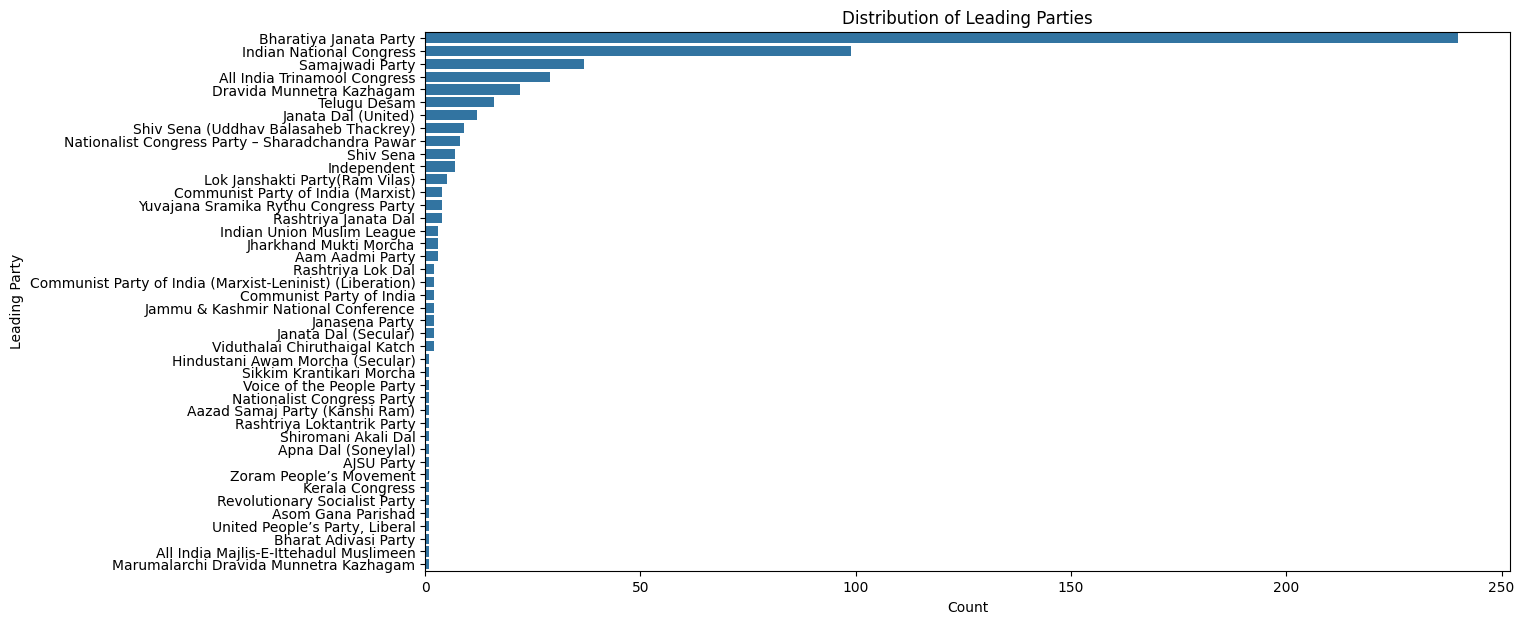

In [9]:
plt.figure(figsize=(14, 7))
sns.countplot(y='Leading Party', data=df, order=df['Leading Party'].value_counts().index)
plt.title('Distribution of Leading Parties')
plt.xlabel('Count')
plt.ylabel('Leading Party')
plt.show()

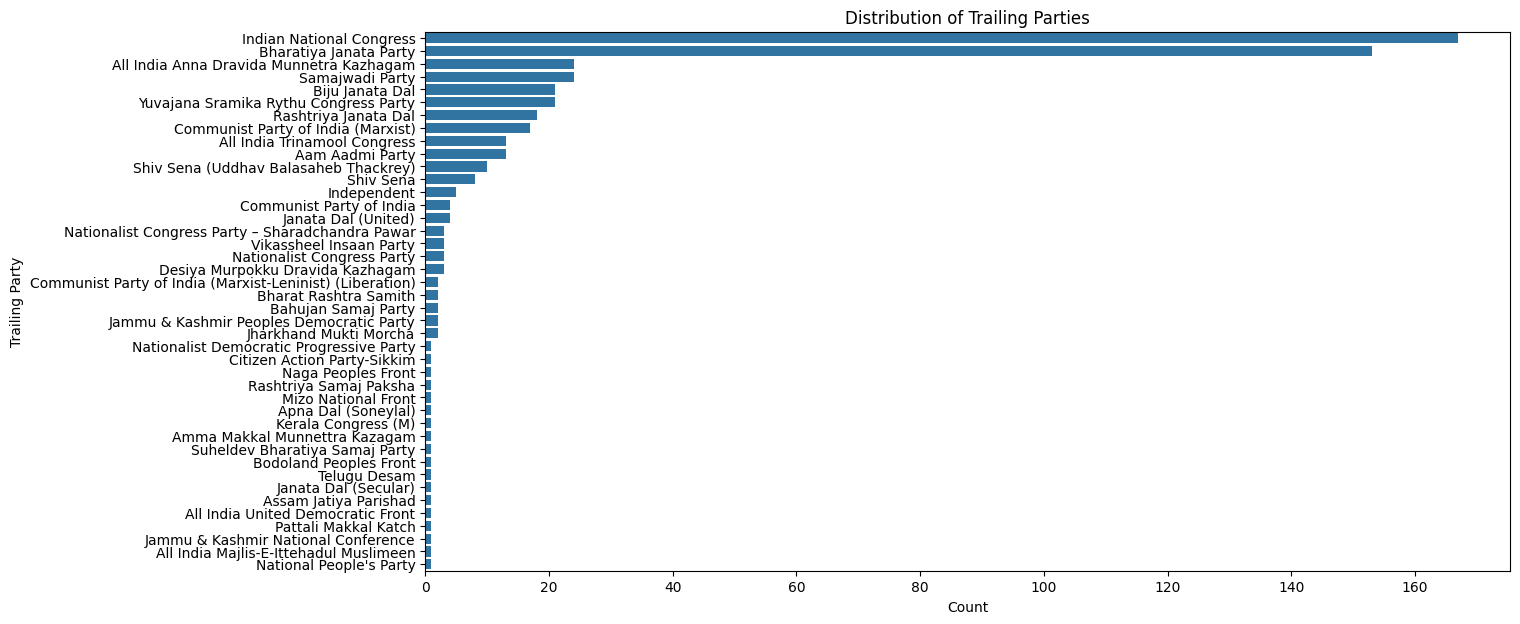

In [10]:
plt.figure(figsize=(14, 7))
sns.countplot(y='Trailing Party', data=df, order=df['Trailing Party'].value_counts().index)
plt.title('Distribution of Trailing Parties')
plt.xlabel('Count')
plt.ylabel('Trailing Party')
plt.show()

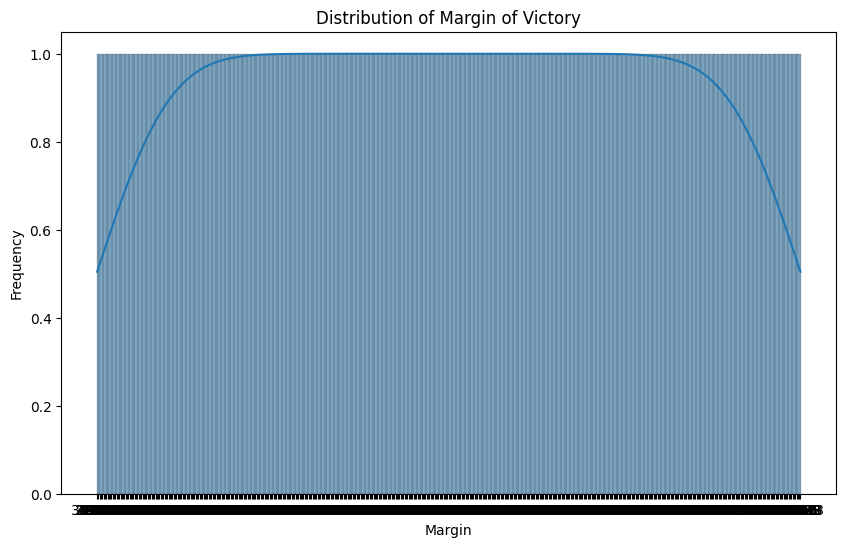

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=30, kde=True)
plt.title('Distribution of Margin of Victory')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()


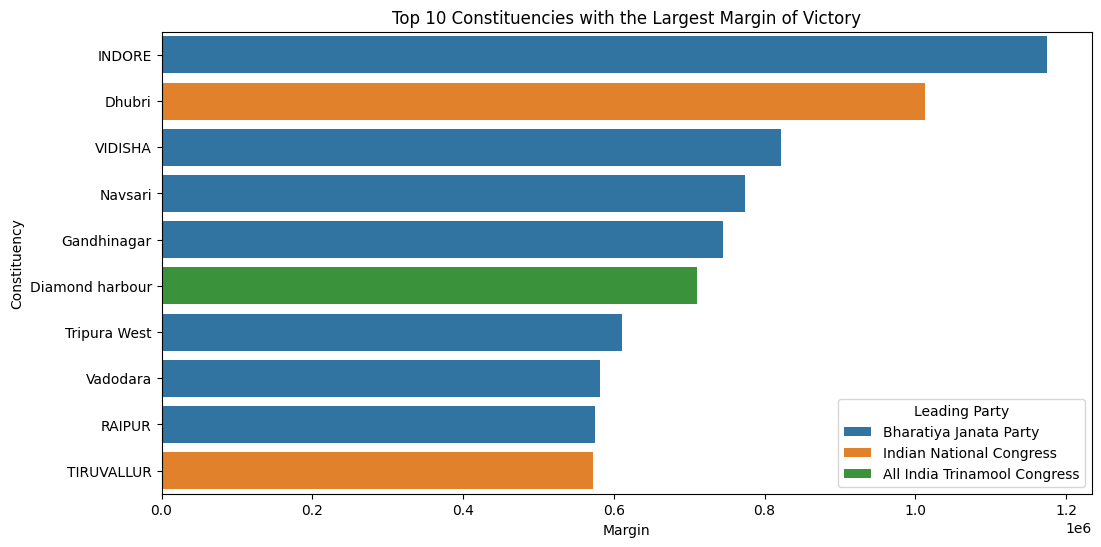

In [12]:
def plot_top_n_margins(df, n=10):

    df['Margin'] = df['Margin'].replace('-', '0')
    df['Margin'] = df['Margin'].str.replace(',', '').astype(int)
    
    top_n_margin = df.nlargest(n, 'Margin')
    

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Margin', y='Constituency', data=top_n_margin, hue='Leading Party')
    plt.title(f'Top {n} Constituencies with the Largest Margin of Victory')
    plt.xlabel('Margin')
    plt.ylabel('Constituency')
    plt.legend(title='Leading Party')
    plt.show()

plot_top_n_margins(df, n=10)

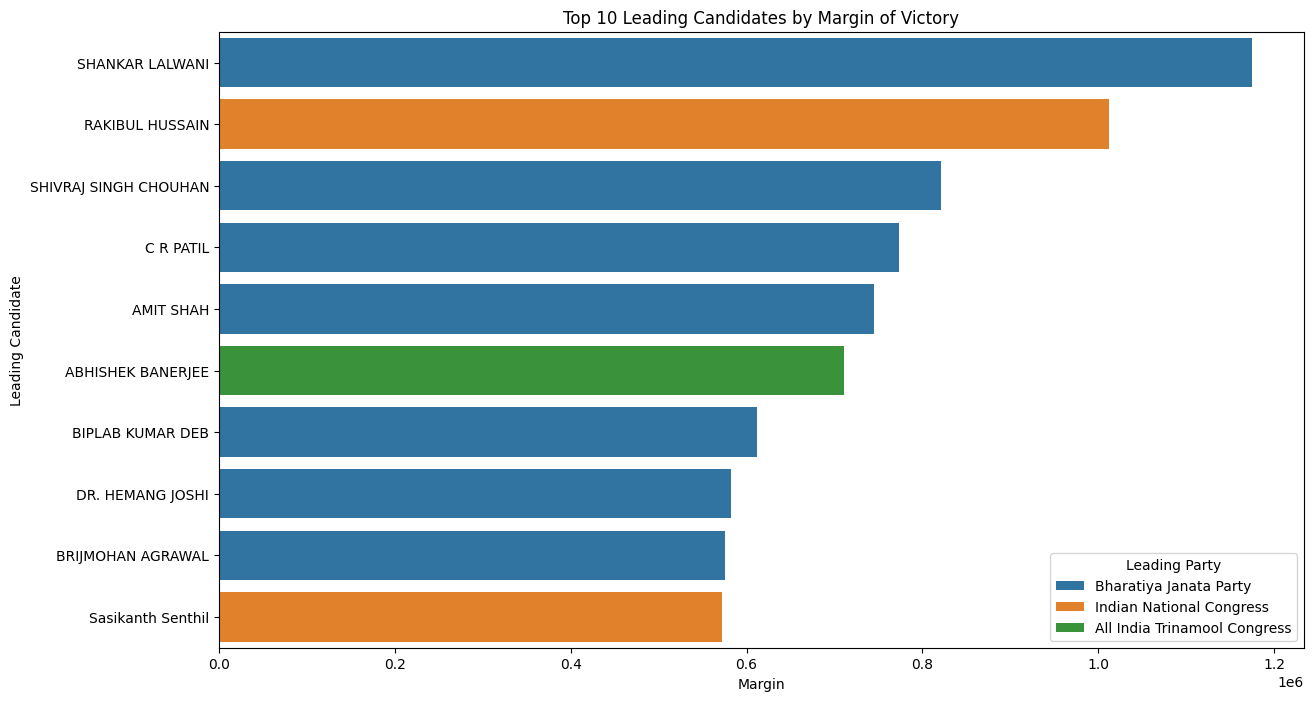

In [13]:
def top_n_leading_candidates(df, n=10):
    top_n_candidates = df.nlargest(n, 'Margin')
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Margin', y='Leading Candidate', data=top_n_candidates, hue='Leading Party')
    plt.title(f'Top {n} Leading Candidates by Margin of Victory')
    plt.xlabel('Margin')
    plt.ylabel('Leading Candidate')
    plt.legend(title='Leading Party')
    plt.show()

top_n_leading_candidates(df, n=10)

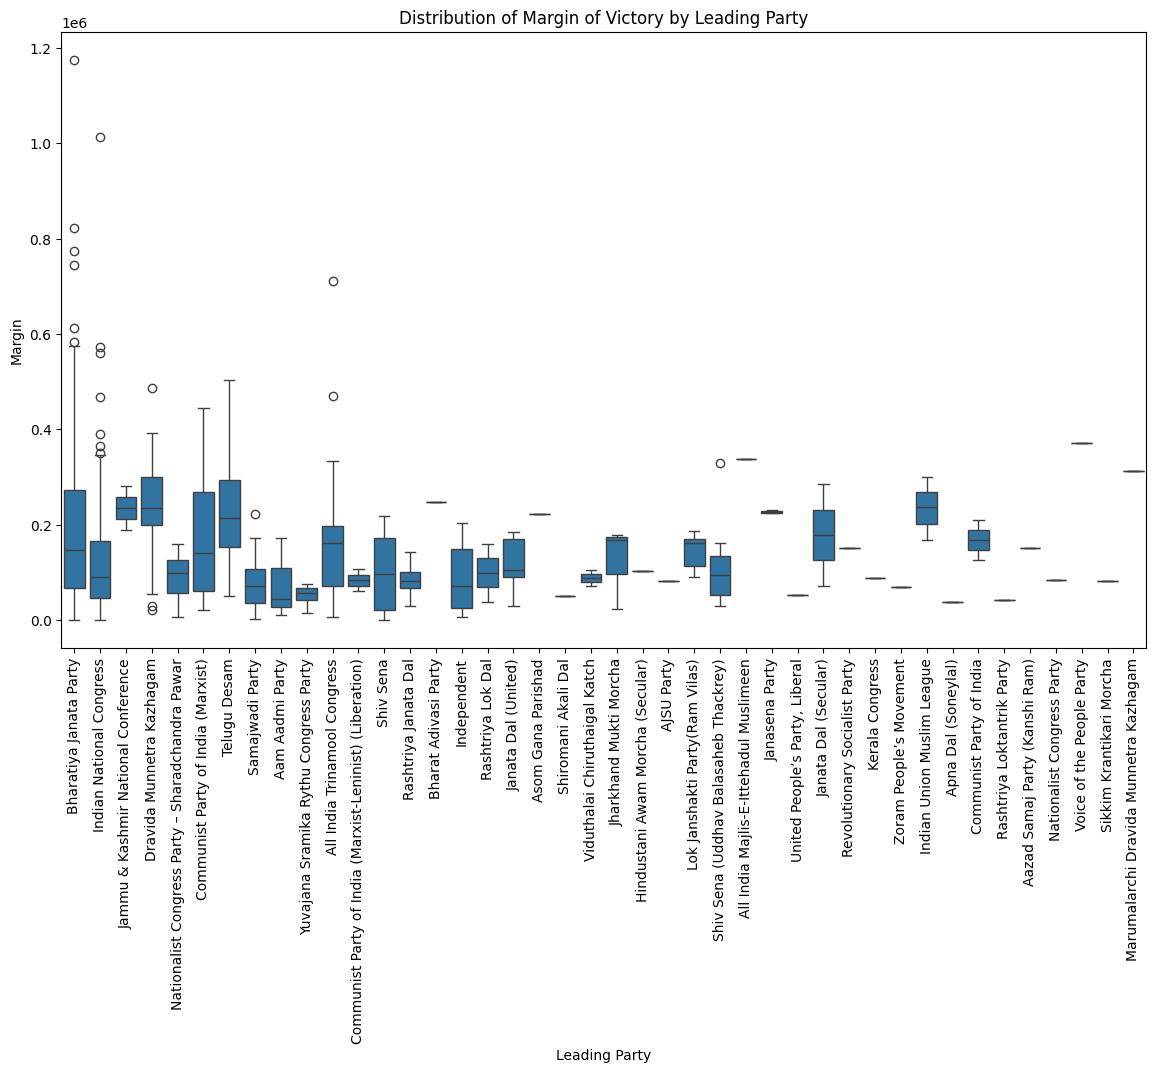

In [14]:
def party_wise_margin_distribution(df):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Leading Party', y='Margin', data=df)
    plt.title('Distribution of Margin of Victory by Leading Party')
    plt.xlabel('Leading Party')
    plt.ylabel('Margin')
    plt.xticks(rotation=90)
    plt.show()

party_wise_margin_distribution(df)

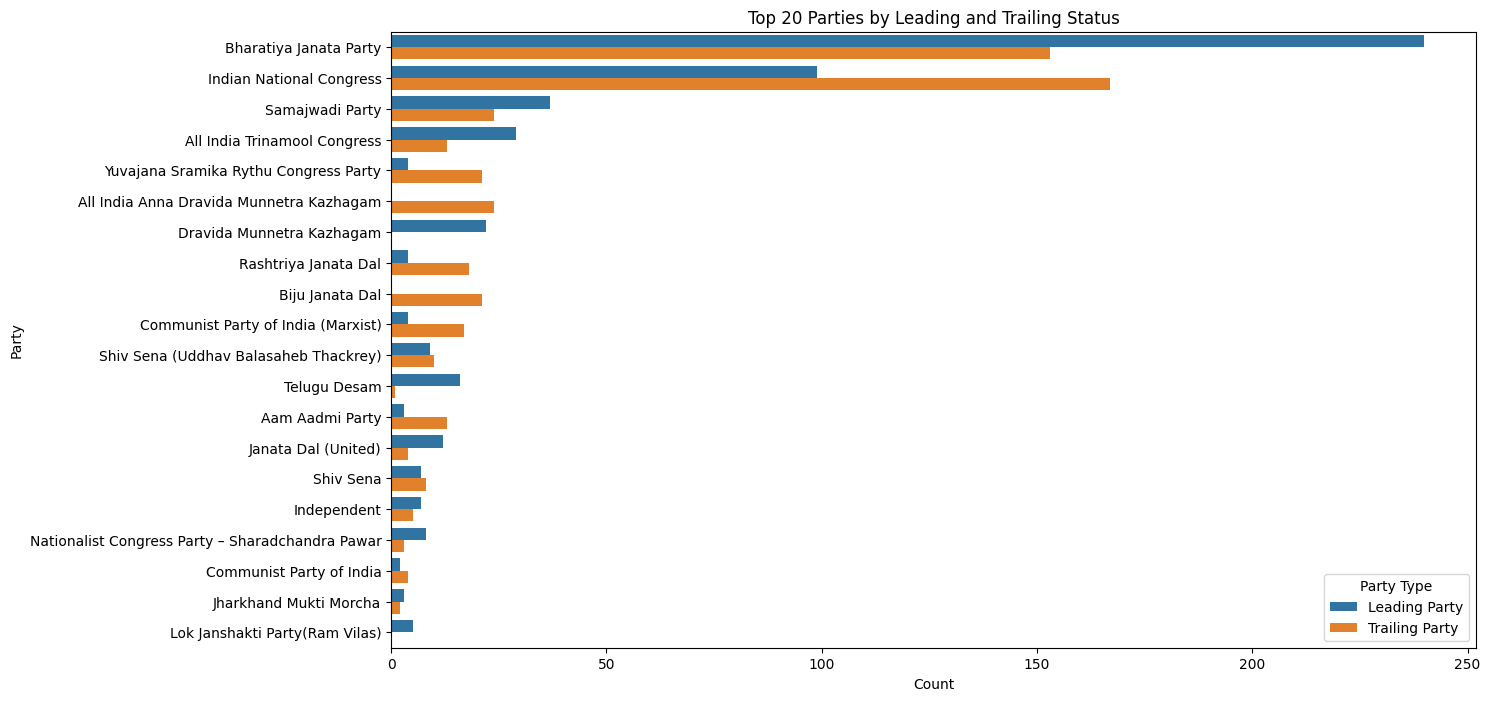

In [15]:
def leading_vs_trailing_parties(df, n=20):
    leading_trailing = df.melt(id_vars=['Constituency'], value_vars=['Leading Party', 'Trailing Party'], 
                               var_name='Party Type', value_name='Party')
    top_n_parties = leading_trailing['Party'].value_counts().index[:n]
    leading_trailing = leading_trailing[leading_trailing['Party'].isin(top_n_parties)]
    plt.figure(figsize=(14, 8))
    sns.countplot(y='Party', hue='Party Type', data=leading_trailing, order=top_n_parties)
    plt.title(f'Top {n} Parties by Leading and Trailing Status')
    plt.xlabel('Count')
    plt.ylabel('Party')
    plt.show()

leading_vs_trailing_parties(df, n=20)


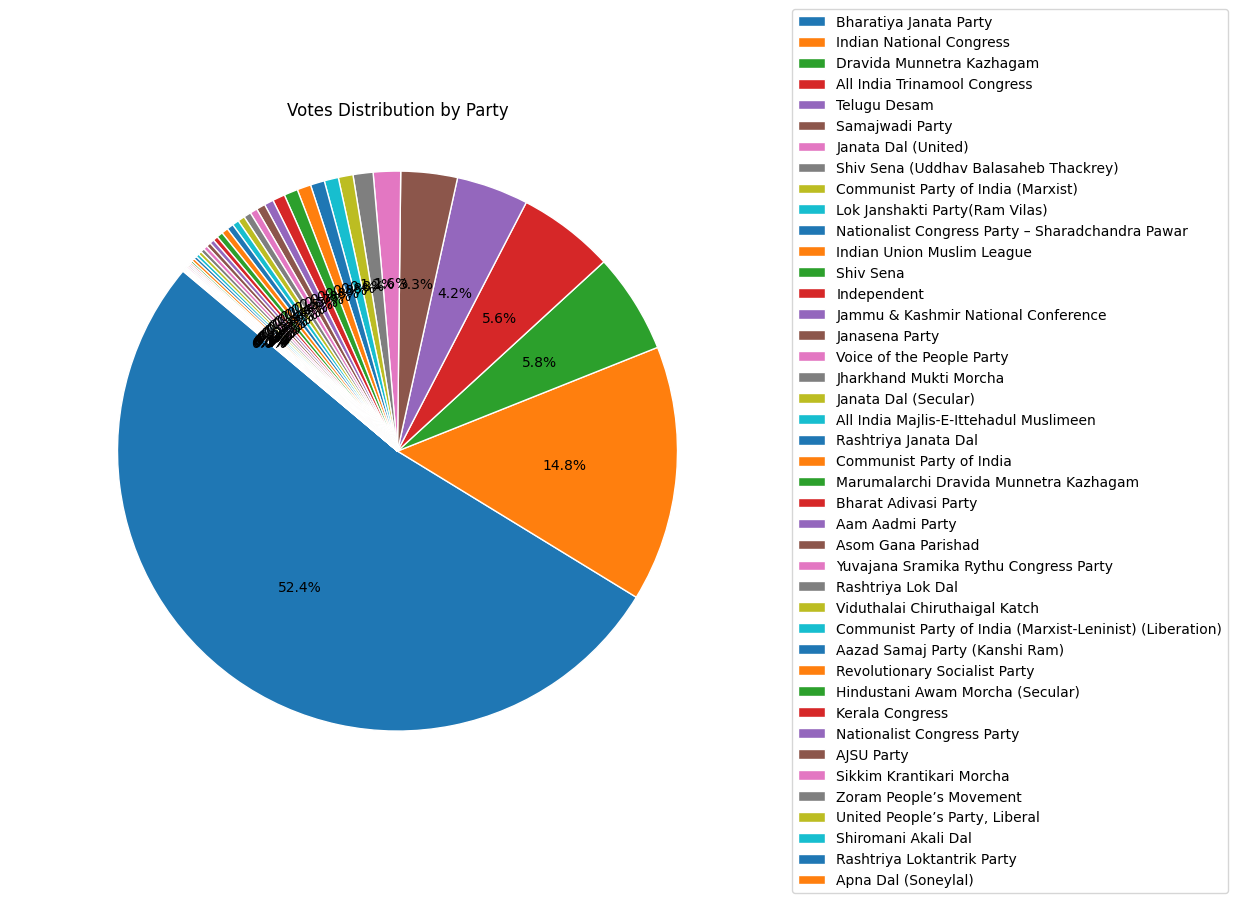

In [16]:
party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()


/var/folders/4h/y182rkf1773fq6lxvssy0bkh0000gn/T/ipykernel_12619/1488383214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Leading Party', y='Margin', palette='muted')


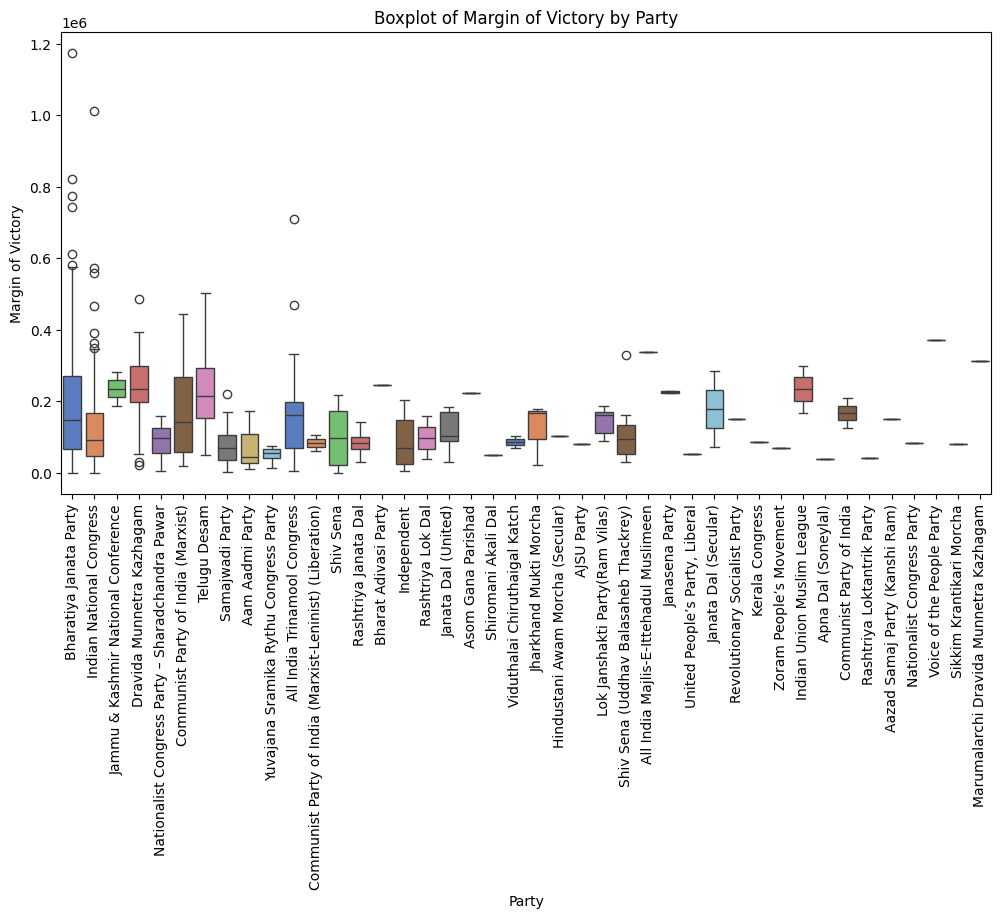

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Leading Party', y='Margin', palette='muted')
plt.title('Boxplot of Margin of Victory by Party')
plt.xlabel('Party')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=90)
plt.show()